# Project: Linear models

## Programming project:  Predicting Apartment Prices in Barcelona 2023

As the real estate market in Barcelona continues to evolve, accurate prediction of apartment prices has become a vital aspect for buyers, sellers, investors, and real estate professionals alike. Understanding the factors that influence property values and being able to forecast future prices is crucial for making informed decisions and maximizing returns on real estate investments.

This assessment aims to delve into the art and science of predicting apartment prices in Barcelona in the year 2023. By analyzing historical data, market trends, and key determinants that impact property values, we will endeavor to develop a robust predictive model capable of estimating apartment prices with a high degree of accuracy.

Data (*Regression_Train.csv*) consist of a list of features plus the resulting <i>price</i>, described below. Each row corresponds to a particular appartment price. Properties are defined by <i>id</i>. 

+ Using this data build a predictive model for <b>price</b> 
+ In your analysis for faster algorithms use the MSE criterion for choosing any hyperparameters 
+ Try a first quick implementation, then try to optimize hyperparameters
+ For this analysis there is an extra test dataset. Once your code is submitted we will run a competition to see how you score in the test data. Hence have prepared also the necessary script to compute the MSE estimate on the test data once released.
+ Bonus: Try an approach to fill NA without removing features or observations, and check improvements.

## 1. You can follow those **steps** in your first implementation:

1. **Dataset Exploration:** Begin by thoroughly exploring and understanding the dataset you are working with. Gain insights into its structure, variables, and any potential patterns or trends that may exist within the data.

2. **Handling Missing Data:** Identify and report any missing data present in the dataset. Implement suitable strategies to handle missing values, such as imputation or elimination, ensuring the integrity and quality of the data.

3. **Addressing Categorical Features and Outliers:** Process the categorical features within the dataset, converting them into a suitable format for machine learning algorithms. Additionally, detect and handle any outliers that may affect the model's performance and make appropriate adjustments or treatments.

4. **Model Building:** Construct your machine learning model using the preprocessed dataset. Utilize an appropriate algorithm based on the nature of your prediction task and the available data. Train the model on the input data and evaluate its performance.

5. **Assessing Accuracy with Cross-Validation:** Optionally, employ cross-validation techniques to assess the expected accuracy of your model. This will help validate the model's generalization capabilities and provide more robust performance metrics.

6. **Identifying Impactful Variables:** Analyze the model's results and identify which variables have the most significant impact on the prediction outcomes. Report these variables, as they offer valuable insights into the factors that drive the predicted prices.

It is recommended to iterate and refine the steps mentioned above based on the performance results obtained during step 5. This iterative process will enable you to enhance the accuracy and overall effectiveness of your model. 


## 2. Main criteria for grading
From more to less important (the weighting of these components will vary between the in-class and extended projects):
+ Code runs
+ Price prediction made
+ Accuracy of predictions for test properties is calculated (kaggle)
+ Linear Model, Ridge and LASSO have been used
+ Accuracy itself
+ Data exploration
+ Data preparation
+ Hyperparameter optimization (alphas)
+ Code is combined with neat and understandable commentary, with some titles and comments (demonstrate you have understood the methods and the outputs produced)
+ Insights obtained

## 3. Data provided

Here are the definitions for each of the variables:

* **num_rooms:** This variable represents the number of bedrooms in an apartment.

* **num_baths:** It refers to the number of bathrooms in an apartment, indicating the count of spaces equipped with facilities for personal hygiene, such as toilets, sinks, and showers or baths.

* **square_meters:** This variable represents the total area or size of the apartment, measured in square meters. It provides an indication of the spatial extent or physical footprint of the property.

* **orientation:** It refers to the cardinal or directional aspect of the apartment, specifying the compass direction it faces or the direction in which its windows are oriented.

* **year_built:** This variable represents the year in which the apartment was constructed or built, providing an indication of its age and potential implications for its condition, architectural style, and infrastructure.

* **door:** It refers to the specific door number or identifier associated with the apartment within a building or complex. It distinguishes one apartment from another within the same property.

* **is_furnished:** This variable indicates whether the apartment is offered or equipped with furniture. It helps determine whether the tenant or buyer will have access to pre-existing furnishings or whether they need to provide their own.

* **has_pool:** It denotes whether the apartment has a swimming pool as part of its amenities or shared facilities. This feature adds a recreational element and can influence the desirability and value of the property.

* **neighborhood:** This variable represents the specific neighborhood or locality in which the apartment is situated within Barcelona. It provides geographical context and helps capture the characteristics and amenities associated with that area.

* **num_crimes:** It refers to the count or frequency of reported crimes that have occurred in the vicinity of the apartment's location or neighborhood. It serves as an indicator of safety and security within the area.

* **has_ac:** This variable indicates whether the apartment is equipped with an air conditioning system, offering cooling or heating capabilities to maintain a comfortable indoor temperature.

* **accepts_pets:** It denotes whether the apartment allows or accepts pets as tenants or residents. This variable is essential for individuals with pets who are seeking suitable accommodations.

* **num_supermarkets:** This variable represents the count or availability of supermarkets in close proximity to the apartment. It reflects the ease of access to grocery shopping facilities in the neighborhood.

* **price:** It represents the price of the apartment, typically measured in a specific currency (e.g., Euros). It is the dependent variable in the prediction task and serves as the target value to be estimated or predicted using the other variables.

## 4. Kaggle submission

Once you have produced testset predictions you can submit these to <i> kaggle </i> in order to see how your model performs and compete with your collegues. 

The following code provides an example of generating a <i> .csv </i> file to submit to kaggle
1. Create a pandas dataframe with two columns, one with the test set "id"'s and the other with your predicted "price" for that observation

2. Use the <i> .to_csv </i> pandas method to create a csv file. The <i> index = False </i> is important to ensure the <i> .csv </i> is in the format kaggle expects 

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load train data and add a colummn to the dataset to identify train data

filename = 'data/train.csv'
df_train = pd.read_csv(filename)
df_train['train'] = 1
df_train.head()

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,train
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096,1
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396,1
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263,1
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290,1
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962,1


## Train data exploration

In [4]:
# Display basic information about the dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8000 non-null   int64  
 1   num_rooms         8000 non-null   float64
 2   num_baths         7840 non-null   float64
 3   square_meters     7845 non-null   float64
 4   orientation       5659 non-null   object 
 5   year_built        7830 non-null   float64
 6   door              7851 non-null   object 
 7   is_furnished      7835 non-null   object 
 8   has_pool          7844 non-null   object 
 9   neighborhood      7835 non-null   object 
 10  num_crimes        7840 non-null   float64
 11  has_ac            7831 non-null   object 
 12  accepts_pets      7845 non-null   object 
 13  num_supermarkets  1411 non-null   float64
 14  price             8000 non-null   int64  
 15  train             8000 non-null   int64  
dtypes: float64(6), int64(3), object(7)
memory 

In [5]:
# Summary statistics for numerical columns

df_train.describe()

,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets,price,train
count,8000.000000,8000.000000,7840.000000,7845.000000,7830.000000,7840.000000,1411.000000,8000.000000,8000.0
mean,5012.506875,2.868500,1.988265,108.031995,1985.321073,2.803444,1.982991,1099.616250,1.0
std,2887.649416,5.300469,0.815943,38.671420,20.591437,3.447714,0.803182,271.686617,0.0
min,2.000000,1.000000,1.000000,-100.000000,1950.000000,0.000000,1.000000,195.000000,1.0
25%,2512.750000,1.000000,1.000000,78.000000,1968.000000,0.000000,1.000000,905.750000,1.0
50%,5014.500000,2.000000,2.000000,110.000000,1985.000000,1.000000,2.000000,1104.000000,1.0
75%,7505.250000,4.000000,3.000000,140.000000,2003.000000,6.000000,3.000000,1295.000000,1.0
max,10000.000000,97.000000,3.000000,170.000000,2021.000000,10.000000,3.000000,2095.000000,1.0


In [6]:
#  Check for missing values

print(df_train.isnull().sum())

id                     0
num_rooms              0
num_baths            160
square_meters        155
orientation         2341
year_built           170
door                 149
is_furnished         165
has_pool             156
neighborhood         165
num_crimes           160
has_ac               169
accepts_pets         155
num_supermarkets    6589
price                  0
train                  0
dtype: int64


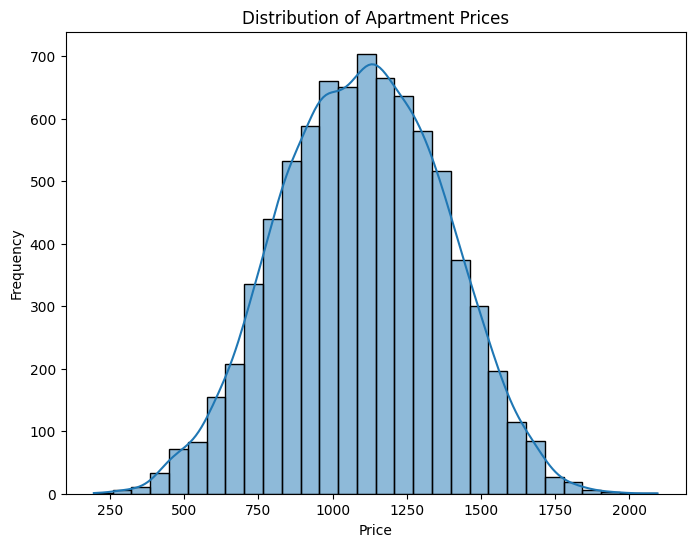

In [7]:
# Visualize the distribution of the target variable 'price'

plt.figure(figsize=(8, 6))
sns.histplot(df_train['price'], bins=30, kde=True)
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Extract floor information and convert it to numerical format

df_train['floor'] = df_train['door'].str.extract(r'(\d+)º').astype(float)
#df_train['floor']=df_train['floor'].astype(str).str[0]

In [62]:
df_train['floor'].isna().value_counts()

floor
False    7851
True      149
Name: count, dtype: int64

In [56]:
#df_train['floor'].value_counts()

floor
1    1535
5     826
6     825
9     818
7     795
3     790
8     779
4     775
2     708
n     149
Name: count, dtype: int64

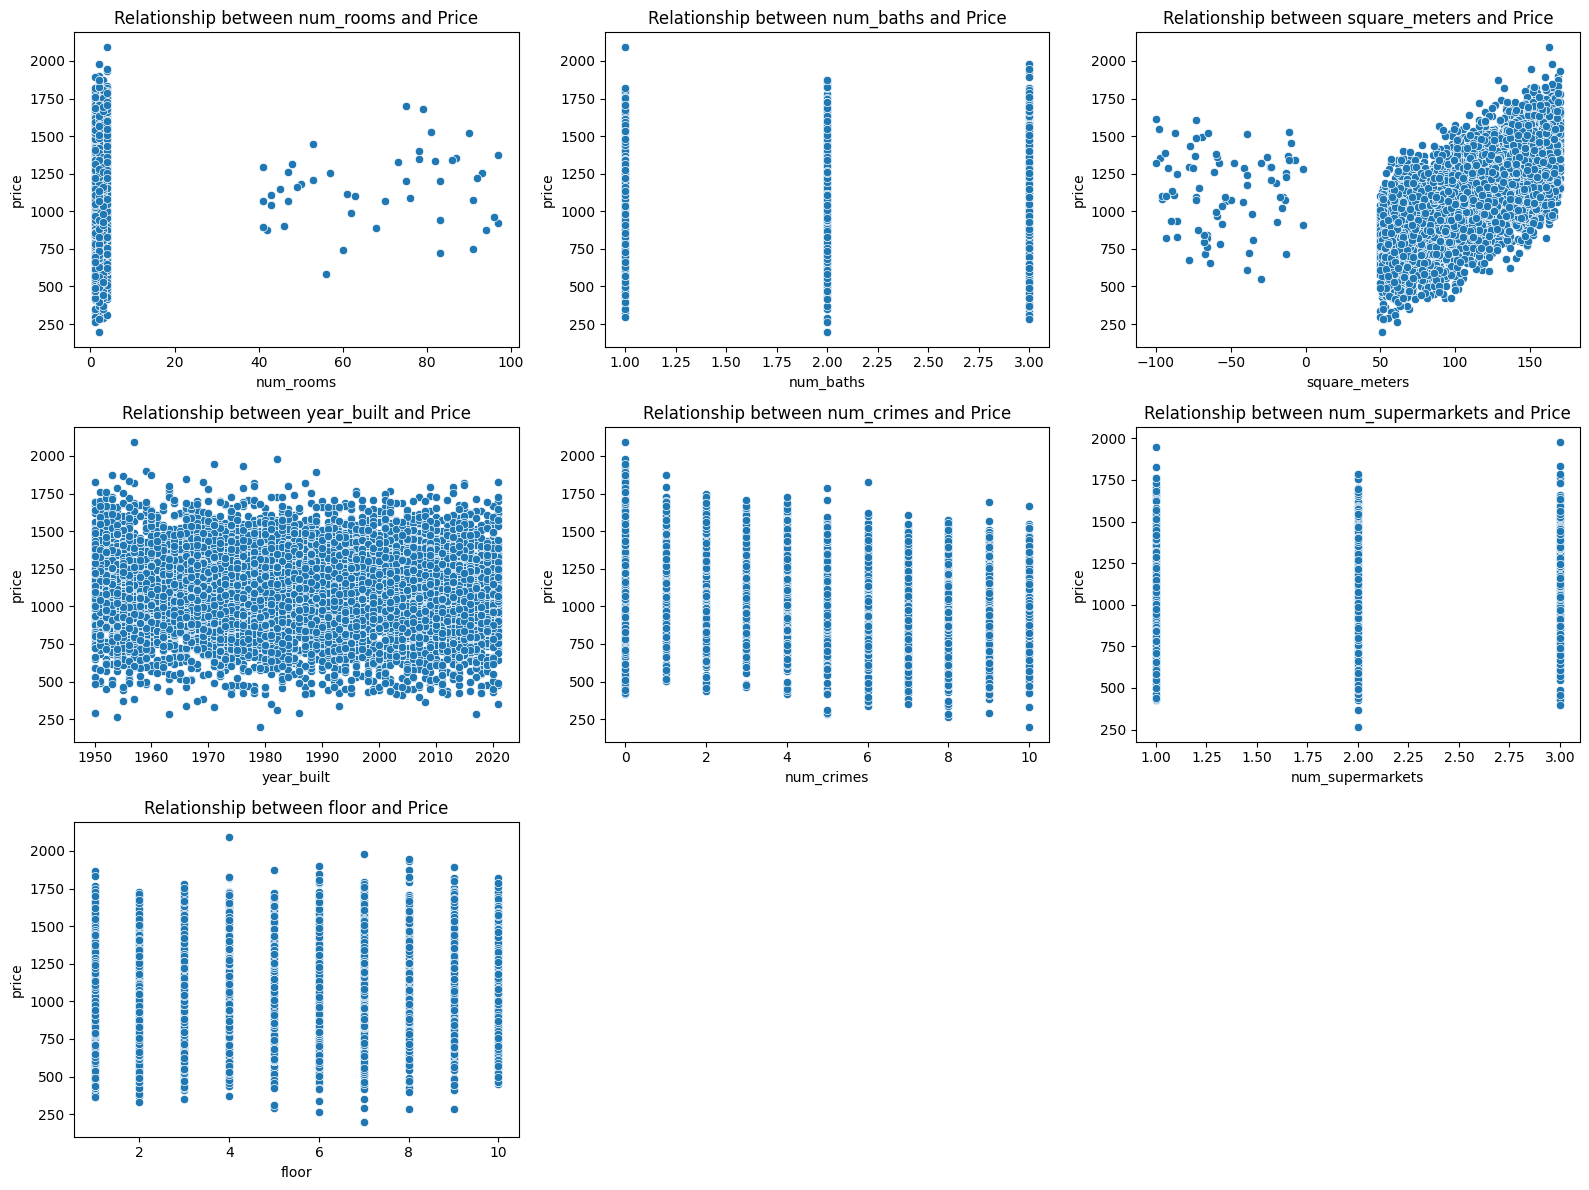

In [10]:
# Visualize the relationships between numerical features and the target 'price'

numerical_features = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes', 'num_supermarkets', 'floor']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df_train, x=feature, y='price')
    plt.title(f'Relationship between {feature} and Price')

plt.tight_layout()
plt.show()

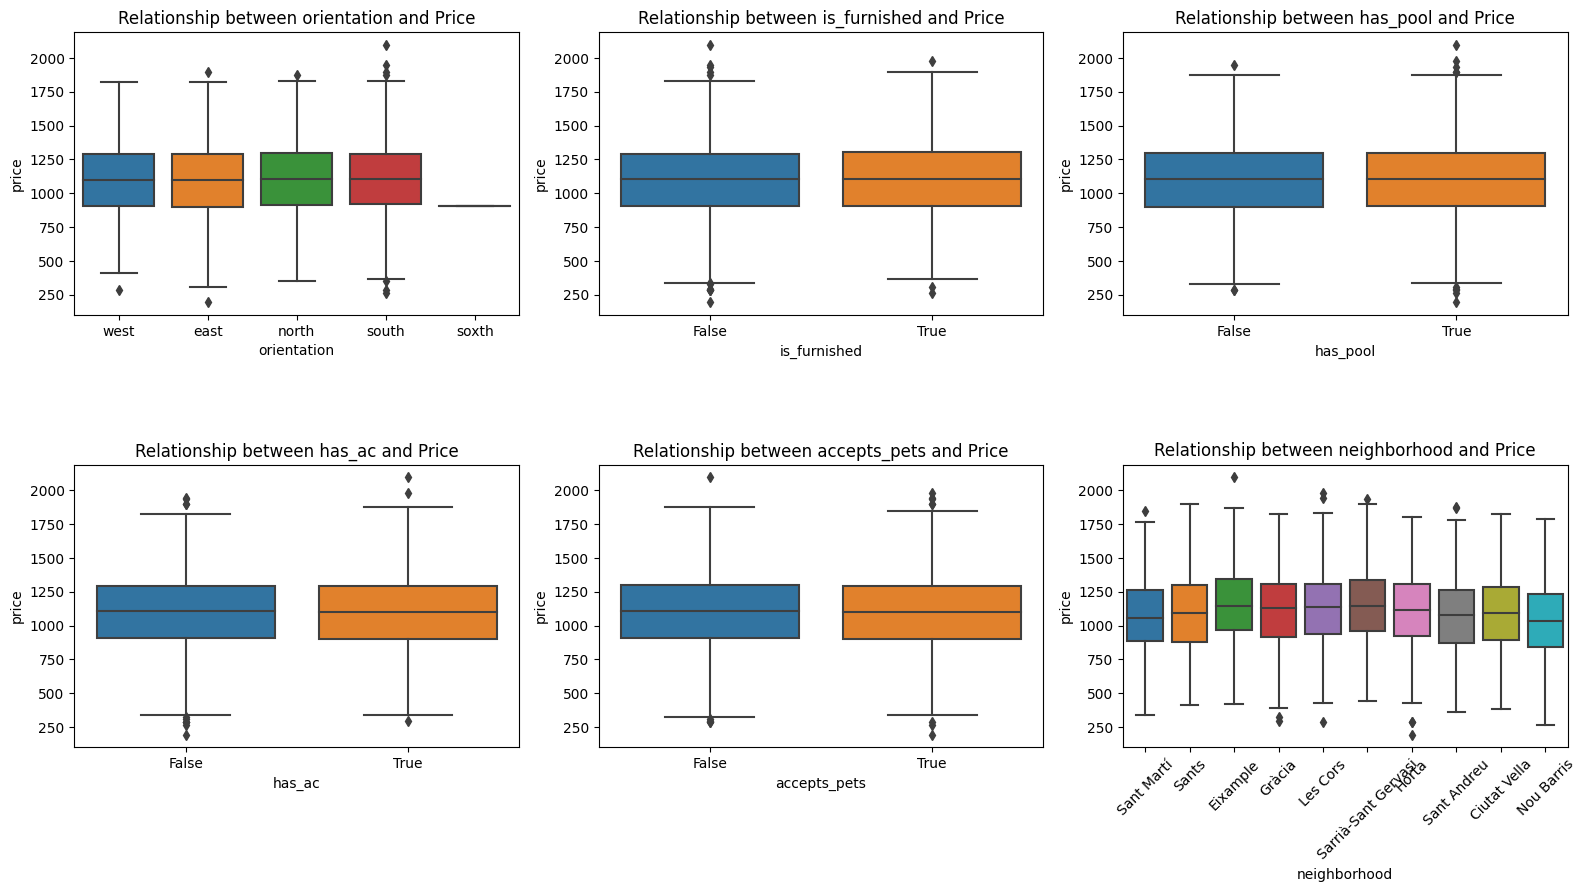

In [46]:
# Visualize categorical variables like 'orientation', 'door', 'is_furnished', 'has_pool', 'neighborhood', 'has_ac', 'accepts_pets'

categorical_features =['orientation', 'is_furnished', 'has_pool',  'has_ac', 'accepts_pets', 'neighborhood']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_train, x=feature, y='price')
    plt.title(f'Relationship between {feature} and Price')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

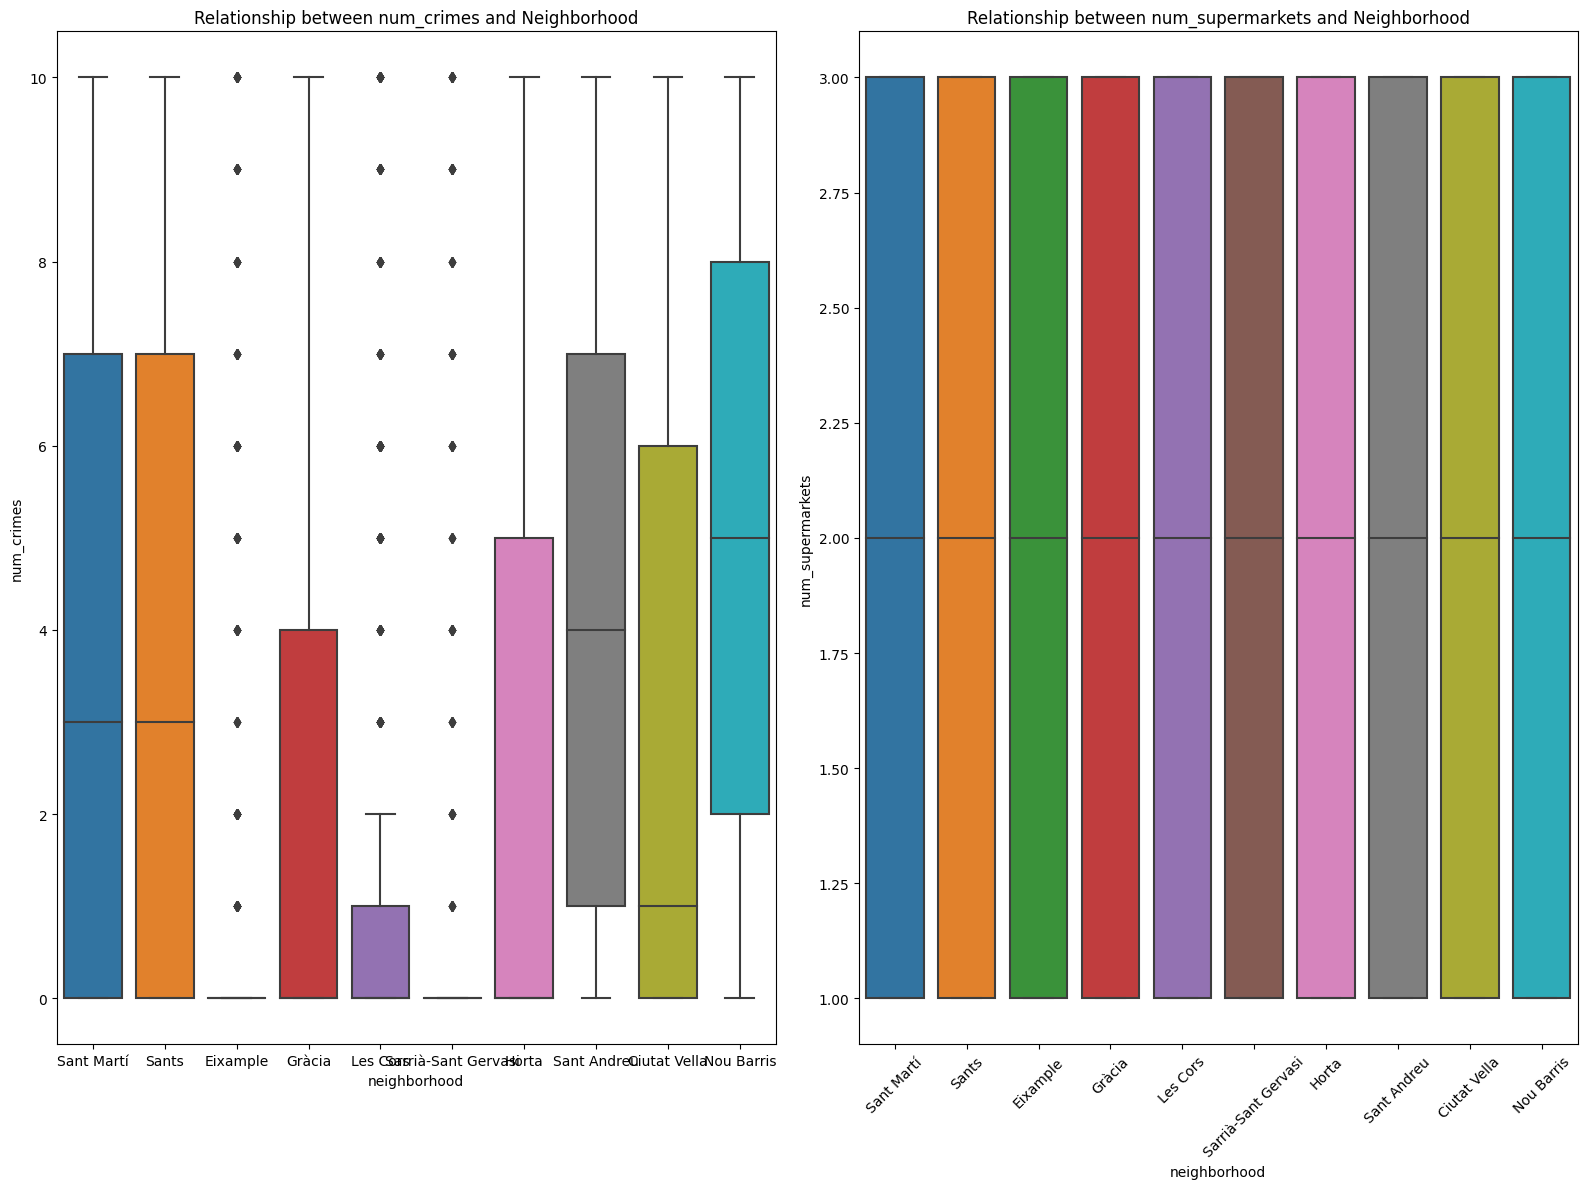

In [50]:
#Visualize distribution of categorical variable neighborhood with other numerical variables different to price to guess 
# which could be a variable to impute NAs. We see that num_crimes has significantly different distributions across neighborhoods.
numerical_features =['num_crimes', 'num_supermarkets']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df_train, x='neighborhood', y=feature)
    plt.title(f'Relationship between {feature} and Neighborhood')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

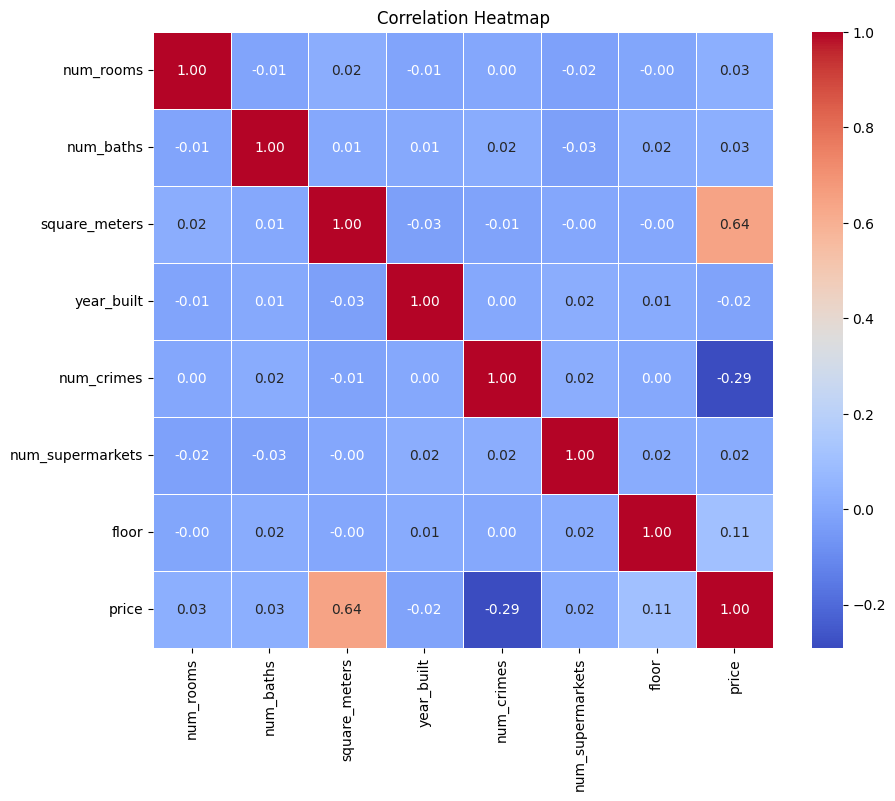

In [12]:
# Correlation heatmap for numerical features

correlation_matrix = df_train[numerical_features + ['price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Data prepocessing

In [13]:
df_test = pd.read_csv('data/test.csv')
df_test['floor'] = df_test['door'].str.extract(r'(\d+)º').astype(float)
df_test['train'] = 0

In [14]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [15]:
# Drop columns

def drop_columns(df, column_names):
    return df.drop(column_names, axis=1)

df = drop_columns(df, ['door', 'orientation']) 

In [16]:
# Replace negative values from square_meters and high values from num_rooms with nan

def clean_data(df):
    df['square_meters'] = df['square_meters'].apply(lambda x: np.nan if x < 0 else x)
    df['num_rooms'] = df['num_rooms'].apply(lambda x: np.nan if x > 10 else x)
    return df

df = clean_data(df)

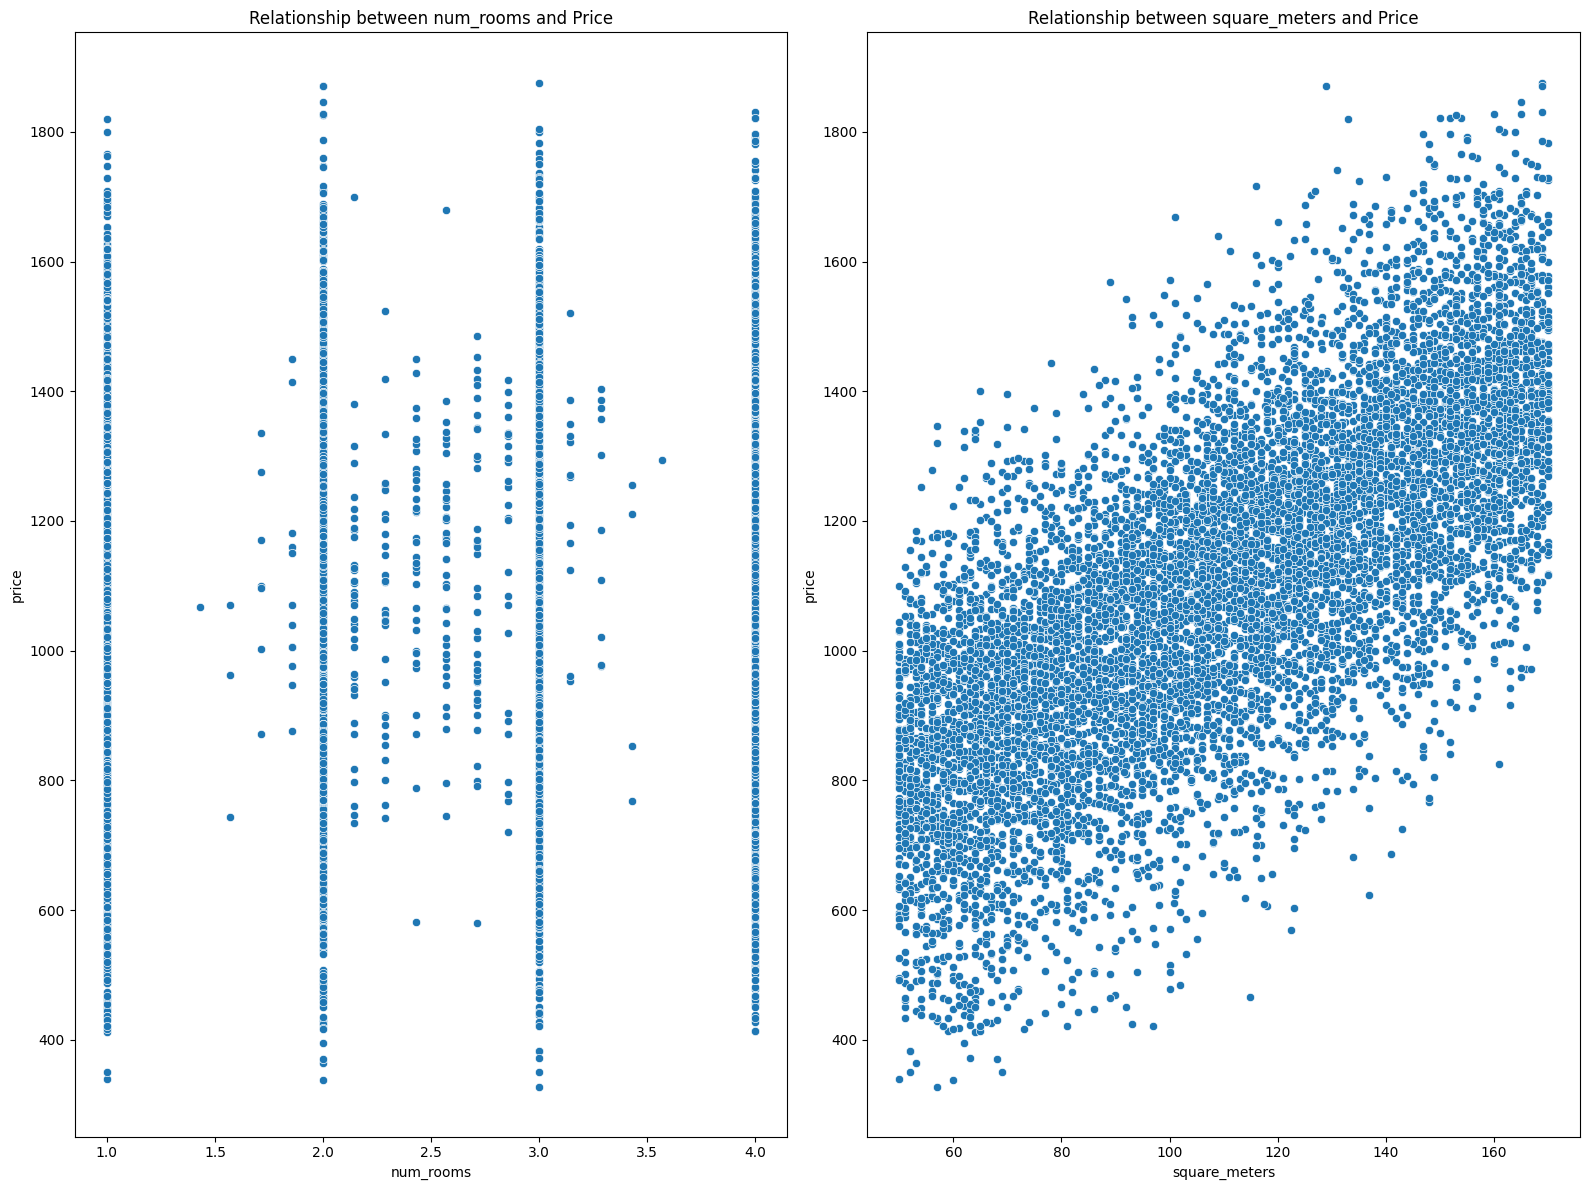

In [33]:
#Plot again the relationship between price and square meters and num of rooms
numerical_features = ['num_rooms','square_meters']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'Relationship between {feature} and Price')

plt.tight_layout()
plt.show()

In [40]:
#Round the numerical variable number of rooms
df['num_rooms']=df['num_rooms'].round()

In [17]:
# Define a function to replace outliers with NaN

def replace_column_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)


def replace_outliers(df, columns):
    # Replace outliers with NaN in the specified columns
    for column_name in columns_to_replace_outliers:
        df[column_name] = replace_column_outliers(df[column_name])
    return df
    
# Specify the columns for which you want to replace outliers with NaN
columns_to_replace_outliers = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes', 'floor', 'price', 'num_supermarkets']

df = replace_outliers(df, columns_to_replace_outliers)
df.head()

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,train,floor
0,9255,1.0,1.0,NaN,1956.0,False,False,Sant Martí,2.0,True,True,NaN,1096.0,1,3.0
1,1562,4.0,1.0,133.0,1960.0,False,False,Sants,4.0,False,False,2.0,1396.0,1,7.0
2,1671,2.0,3.0,137.0,2000.0,False,True,Eixample,0.0,False,False,NaN,1263.0,1,1.0
3,6088,1.0,2.0,NaN,2002.0,False,True,Sants,5.0,False,False,NaN,1290.0,1,6.0
4,6670,2.0,1.0,70.0,1979.0,True,False,Gràcia,0.0,False,True,3.0,962.0,1,5.0


In [18]:
def bolean_to_int(df):
    # Replace True/False with 1/0
    df["is_furnished"] =  df["is_furnished"].replace({True: 1, False: 0})
    df["has_pool"] = df["has_pool"].replace({True: 1, False: 0})
    df["has_ac"] = df["has_ac"].replace({True: 1, False: 0})
    df["accepts_pets"] = df["accepts_pets"].replace({True: 1, False: 0})
    return df

df = bolean_to_int(df)
df.head()

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,train,floor
0,9255,1.0,1.0,NaN,1956.0,0.0,0.0,Sant Martí,2.0,1.0,1.0,NaN,1096.0,1,3.0
1,1562,4.0,1.0,133.0,1960.0,0.0,0.0,Sants,4.0,0.0,0.0,2.0,1396.0,1,7.0
2,1671,2.0,3.0,137.0,2000.0,0.0,1.0,Eixample,0.0,0.0,0.0,NaN,1263.0,1,1.0
3,6088,1.0,2.0,NaN,2002.0,0.0,1.0,Sants,5.0,0.0,0.0,NaN,1290.0,1,6.0
4,6670,2.0,1.0,70.0,1979.0,1.0,0.0,Gràcia,0.0,0.0,1.0,3.0,962.0,1,5.0


In [19]:
def impute_missing_values(df_to_impute, columns):
    # Initialize the StandardScaler to standardize the numerical columns
    scaler = StandardScaler()

    # Fit and transform the scaler on the selected numerical columns
    df_to_impute[columns] = scaler.fit_transform(df_to_impute[columns])

    # Initialize the KNNImputer with the number of neighbors (k) you prefer
    knn_imputer = KNNImputer(n_neighbors=7)  # You can adjust the value of 'n_neighbors'

    # Fit and transform the imputer on the standardized numerical columns
    df_to_impute[columns] = knn_imputer.fit_transform(df_to_impute[columns])

    # Inverse transform the standardized data to get the imputed values back to the original scale
    df_to_impute[columns] = scaler.inverse_transform(df_to_impute[columns])
    
    return df_to_impute
    
# Select the numerical columns you want to impute missing values for
numerical_columns = ['num_rooms', 'num_baths', 'square_meters', 'year_built',
                     'num_crimes',  'floor', 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets', 'price']

df = impute_missing_values(df, numerical_columns)
df.head()

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,train,floor
0,9255,1.0,1.0,102.571429,1956.0,0.0,0.0,Sant Martí,2.0,1.0,1.0,NaN,1096.0,1,3.0
1,1562,4.0,1.0,133.000000,1960.0,0.0,0.0,Sants,4.0,0.0,0.0,2.0,1396.0,1,7.0
2,1671,2.0,3.0,137.000000,2000.0,0.0,1.0,Eixample,0.0,0.0,0.0,NaN,1263.0,1,1.0
3,6088,1.0,2.0,137.142857,2002.0,0.0,1.0,Sants,5.0,0.0,0.0,NaN,1290.0,1,6.0
4,6670,2.0,1.0,70.000000,1979.0,1.0,0.0,Gràcia,0.0,0.0,1.0,3.0,962.0,1,5.0


In [20]:
def impute_categorical_columns(df):

    # List of categorical and boolean column names
    categorical_columns = ['neighborhood']

    # Perform mode imputation for each categorical and boolean column
    for column_name in categorical_columns:
        mode_value = df[column_name].mode()[0]  # Calculate the mode
        df[column_name].fillna(mode_value, inplace=True)  # Fill missing values with the mode
    return df


df = impute_categorical_columns(df)
df.head()

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,train,floor
0,9255,1.0,1.0,102.571429,1956.0,0.0,0.0,Sant Martí,2.0,1.0,1.0,NaN,1096.0,1,3.0
1,1562,4.0,1.0,133.000000,1960.0,0.0,0.0,Sants,4.0,0.0,0.0,2.0,1396.0,1,7.0
2,1671,2.0,3.0,137.000000,2000.0,0.0,1.0,Eixample,0.0,0.0,0.0,NaN,1263.0,1,1.0
3,6088,1.0,2.0,137.142857,2002.0,0.0,1.0,Sants,5.0,0.0,0.0,NaN,1290.0,1,6.0
4,6670,2.0,1.0,70.000000,1979.0,1.0,0.0,Gràcia,0.0,0.0,1.0,3.0,962.0,1,5.0


In [21]:
# Imputing 'num_supermarkets' using mean number of supermarkets based on neighborhood
supermarkets_means=df.groupby('neighborhood')['num_supermarkets'].mean()
df['num_supermarkets'] = df['neighborhood'].map(supermarkets_means)

In [22]:
# Encoding the categorical variable 'Neighbourhood' using target encoding
neighbourhood_means=df.groupby('neighborhood')['price'].mean()
df['neighbourhood_means'] = df['neighborhood'].map(neighbourhood_means)

In [23]:
def get_dummies(df):
    return pd.get_dummies(df).reset_index(drop=True)
  

df = get_dummies(df)
df.head()

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,...,neighborhood_Ciutat Vella,neighborhood_Eixample,neighborhood_Gràcia,neighborhood_Horta,neighborhood_Les Cors,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi
0,9255,1.0,1.0,102.571429,1956.0,0.0,0.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,True,False,False
1,1562,4.0,1.0,133.000000,1960.0,0.0,0.0,4.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,1671,2.0,3.0,137.000000,2000.0,0.0,1.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False
3,6088,1.0,2.0,137.142857,2002.0,0.0,1.0,5.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,6670,2.0,1.0,70.000000,1979.0,1.0,0.0,0.0,0.0,1.0,...,False,False,True,False,False,False,False,False,False,False


In [24]:
X_train = df[df.train == 1][['num_rooms', 'num_baths', 'square_meters', 'year_built',
       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets', 
       'floor', 'neighborhood_Ciutat Vella', 'neighborhood_Eixample',
       'neighborhood_Gràcia', 'neighborhood_Horta', 'neighborhood_Les Cors',
       'neighborhood_Nou Barris', 'neighborhood_Sant Andreu',
       'neighborhood_Sant Martí', 'neighborhood_Sants',
       'neighborhood_Sarrià-Sant Gervasi', 'num_supermarkets']]
y_train = df[df.train == 1]['price']

X_test_to_predict = df[df.train == 0][['num_rooms', 'num_baths', 'square_meters', 'year_built',
       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets', 
       'floor', 'neighborhood_Ciutat Vella', 'neighborhood_Eixample',
       'neighborhood_Gràcia', 'neighborhood_Horta', 'neighborhood_Les Cors',
       'neighborhood_Nou Barris', 'neighborhood_Sant Andreu',
       'neighborhood_Sant Martí', 'neighborhood_Sants',
       'neighborhood_Sarrià-Sant Gervasi', 'num_supermarkets']]

In [25]:
'''
X_train = df[df.group_train == 1][['num_rooms', 'num_baths', 'square_meters', 'year_built',
       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets', 
       'floor', 'neighbourhood_means', 'num_supermarkets']]
y_train = df[df.group_train == 1]['price']

X_test_to_predict = df[df.group_test == 1][['num_rooms', 'num_baths', 'square_meters', 'year_built',
       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets', 
       'floor', 'neighbourhood_means', 'num_supermarkets']]
'''

"\nX_train = df[df.group_train == 1][['num_rooms', 'num_baths', 'square_meters', 'year_built',\n       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets', \n       'floor', 'neighbourhood_means', 'num_supermarkets']]\ny_train = df[df.group_train == 1]['price']\n\nX_test_to_predict = df[df.group_test == 1][['num_rooms', 'num_baths', 'square_meters', 'year_built',\n       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets', \n       'floor', 'neighbourhood_means', 'num_supermarkets']]\n"

In [26]:
# Split train dataset into train and test sets itself
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on X_train
X_train = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test = scaler.transform(X_test)


X_test_to_predict = scaler.transform(X_test_to_predict)


## Train and evaluate the model

In [28]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_lr = np.reshape(y_pred_lr, (-1,))

# Specify the number of cross-validation folds (e.g., 5-fold)
num_folds = 10

# Perform cross-validation and use "MSE" as the scoring metric
mse_scores_lr = -cross_val_score(lr_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')
mean_mse_lr = mse_scores_lr.mean()

mse_scores_lr_test = -cross_val_score(lr_model, X_test, y_test, cv=num_folds, scoring='neg_mean_squared_error')
mean_mse_lr_test = mse_scores_lr_test.mean()

# Print the results
print(f"TRAIN Mean MSE: {mean_mse_lr:.2f}")
print(f"TEST Mean MSE: {mean_mse_lr_test:.2f}")

y_pred_lr_final = lr_model.predict(X_test_to_predict)

TRAIN Mean MSE: 28106.67
TEST Mean MSE: 29304.85


In [29]:
# Define a range of alpha values to try
alphas = np.logspace(0.5, 2, 50)

# Initialize variables to store the best alpha and minimum MSE
best_alpha_ridge = None
min_mse_ridge = float('inf')

for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)  # You can adjust the regularization strength (alpha)
    ridge_model.fit(X_train, y_train)

    y_pred_ridge = ridge_model.predict(X_test)
    y_pred_ridge = np.reshape(y_pred_ridge, (-1,))

    # Specify the number of cross-validation folds (e.g., 5-fold)
    num_folds = 5

    # Perform cross-validation and use "MSE" as the scoring metric
    mse_scores_ridge = -cross_val_score(ridge_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')
    mean_mse_ridge = mse_scores_ridge.mean()

    mse_scores_ridge_test = -cross_val_score(ridge_model, X_test, y_test, cv=num_folds, scoring='neg_mean_squared_error')
    mean_mse_ridge_test = mse_scores_ridge_test.mean()

    # Print the results
   # print(f"TRAIN Mean MSE: {mean_mse_ridge:.2f}")
    print(f"TEST Mean MSE: {mean_mse_ridge_test:.2f}")
    print(alpha)

    
    # Update best alpha and minimum MSE for Ridge
    if mean_mse_ridge_test < min_mse_ridge:
        min_mse_ridge = mean_mse_ridge_test
        best_alpha_ridge = alpha
        
        # Save only the best predictions
        y_pred_ridge_final = ridge_model.predict(X_test_to_predict)
    
print("Best alpha for Ridge:", round(best_alpha_ridge,3))
print("Minimum MSE for Ridge:", round(min_mse_ridge,3))

TEST Mean MSE: 29407.06
3.1622776601683795
TEST Mean MSE: 29406.88
3.393221771895329
TEST Mean MSE: 29406.69
3.6410319493106744
TEST Mean MSE: 29406.49
3.906939937054617
TEST Mean MSE: 29406.28
4.192267435236917
TEST Mean MSE: 29406.07
4.498432668969446
TEST Mean MSE: 29405.84
4.826957437677871
TEST Mean MSE: 29405.60
5.179474679231212
TEST Mean MSE: 29405.35
5.557736586486878
TEST Mean MSE: 29405.10
5.963623316594643
TEST Mean MSE: 29404.83
6.399152336349265
TEST Mean MSE: 29404.56
6.8664884500430015
TEST Mean MSE: 29404.28
7.367954559661629
TEST Mean MSE: 29404.00
7.9060432109077
TEST Mean MSE: 29403.71
8.48342898244072
TEST Mean MSE: 29403.43
9.102981779915218
TEST Mean MSE: 29403.15
9.76778110089489
TEST Mean MSE: 29402.88
10.481131341546858
TEST Mean MSE: 29402.61
11.246578221198195
TEST Mean MSE: 29402.37
12.067926406393289
TEST Mean MSE: 29402.15
12.949258422052624
TEST Mean MSE: 29401.96
13.894954943731374
TEST Mean MSE: 29401.81
14.909716571840645
TEST Mean MSE: 29401.72
15.99

In [30]:
# Initialize variables to store the best alpha and minimum MSE
lasso = None
min_mse_lasso = float('inf')
best_alpha_lasso = None

for alpha in alphas:
    # Train Lasso Regression
    lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha)
    lasso_model.fit(X_train, y_train)

    y_pred_lasso = lasso_model.predict(X_test)
    y_pred_lasso = np.reshape(y_pred_lasso, (-1,))

    # Specify the number of cross-validation folds (e.g., 5-fold)
    num_folds = 5

    # Perform cross-validation and use "MSE" as the scoring metric
    mse_scores_lasso = -cross_val_score(lasso_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')
    mean_mse_lasso = mse_scores_lasso.mean()

    mse_scores_lasso_test = -cross_val_score(lasso_model, X_test, y_test, cv=num_folds, scoring='neg_mean_squared_error')
    mean_mse_lasso_test = mse_scores_lasso_test.mean()

    # Print the results
    #print(f"TRAIN Mean MSE: {mean_mse_lasso:.2f}")
    print(f"TEST Mean MSE: {mean_mse_lasso_test:.2f}")
    print(alpha)
    
    # Update best alpha and minimum MSE for Ridge
    if mean_mse_lasso_test < min_mse_lasso:
        min_mse_lasso = mean_mse_lasso_test
        best_alpha_lasso = alpha

        y_pred_lasso_final = lasso_model.predict(X_test_to_predict)
        
        
print("Best alpha for Lasso:", round(best_alpha_lasso,3))
print("Minimum MSE for Lasso:", round(min_mse_lasso,3))

TEST Mean MSE: 29304.73
3.1622776601683795


TEST Mean MSE: 29304.73
3.393221771895329
TEST Mean MSE: 29304.73
3.6410319493106744
TEST Mean MSE: 29304.73
3.906939937054617
TEST Mean MSE: 29304.73
4.192267435236917
TEST Mean MSE: 29304.73
4.498432668969446
TEST Mean MSE: 29304.73
4.826957437677871
TEST Mean MSE: 29304.73
5.179474679231212
TEST Mean MSE: 29304.73
5.557736586486878
TEST Mean MSE: 29304.73
5.963623316594643
TEST Mean MSE: 29304.73
6.399152336349265
TEST Mean MSE: 29304.73
6.8664884500430015
TEST Mean MSE: 29304.73
7.367954559661629
TEST Mean MSE: 29304.73
7.9060432109077
TEST Mean MSE: 29304.73
8.48342898244072
TEST Mean MSE: 29304.73
9.102981779915218
TEST Mean MSE: 29304.73
9.76778110089489
TEST Mean MSE: 29304.73
10.481131341546858
TEST Mean MSE: 29304.73
11.246578221198195
TEST Mean MSE: 29304.73
12.067926406393289
TEST Mean MSE: 29304.73
12.949258422052624
TEST Mean MSE: 29304.73
13.894954943731374
TEST Mean MSE: 29304.73
14.909716571840645
TEST Mean MSE: 29304.73
15.998587196060582
TEST Mean MSE: 29304.73
17.16

In [31]:
# Produce .csv for kaggle testing 

# Choose the model you want to save: y_pred_lr_final / y_pred_ridge_final / y_pred_lasso_final
final_results = y_pred_lasso_final
filename = 'lasso'

test_predictions_submit = pd.DataFrame({"id": df[df.train == 0]["id"].values, "price": final_results})
test_predictions_submit.to_csv(f"predictions/test_predictions_submit_{filename}.csv", index = False)